In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from itertools import combinations
from scipy import stats as st
import numpy as np

In [2]:
# Machine learning model libraries 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.ensemble import BalancedRandomForestClassifier

In [3]:
# Import Dataset
df = pd.read_csv("../Resources/sb_champion_stats.csv", index_col = 1)
df.head()

,Unnamed: 0,total_tackles_def,sacks_def,safties_def,passes_defended_def,ints_def,fumbles_lost_fum,td_passes_pass,ints_pass,sacks_pass,...,year,team,fg_success_rate,extra_success_rate,pass_success_rate,avg_yards_pass,avg_yards_rush,kicks_blocked,passes_per_rushing_plays,Champion
team_year,,,,,,,,,,,,,,,,,,,,,
arizona_cardinals_2001,0,670,5,0,29,13,7.0,0.0,0.0,0.0,...,2001,arizona_cardinals,0.833333,1.0,0.000000,10.715232,3.546939,0.0,0.004082,0.0
arizona_cardinals_2002,1,547,12,0,24,7,1.0,0.0,2.0,5.0,...,2002,arizona_cardinals,0.000000,0.0,0.388889,11.470588,4.256410,0.0,0.461538,0.0
arizona_cardinals_2003,2,548,15,0,35,8,7.0,5.0,7.0,25.0,...,2003,arizona_cardinals,0.750000,1.0,0.568862,12.957831,4.943396,0.0,3.150943,0.0
arizona_cardinals_2004,3,511,16,0,43,7,7.0,13.0,18.0,39.0,...,2004,arizona_cardinals,0.758621,1.0,0.560150,11.369231,3.585034,0.0,3.619048,0.0
arizona_cardinals_2005,4,483,19,0,27,9,11.0,21.0,21.0,45.0,...,2005,arizona_cardinals,0.955556,1.0,0.625373,12.421053,3.541436,0.0,3.701657,0.0


In [4]:
# Drop Columns 
df = df.drop(["year", "team", "Unnamed: 0", "extra_success_rate", "fg_success_rate", "kicks_blocked", 
             "safties_def", "avg_yards_rush", "avg_yards_pass", "ints_def", "total_tackles_def"], axis = 1)
df.shape

(511, 11)

In [5]:
X = df.drop("Champion", axis = 1)
y = df["Champion"]

# Scaling Features

In [6]:
# Generate Scaler instance and scale the data
X_scaled = StandardScaler().fit_transform(X)

# Adressing Target Variable Imbalance

## Target variable imbalance needs to be addressed to avoid overfitting

In [7]:
# Value counts for target variable shows a minority:majority class ratio of about 1:30
y.value_counts()

0.0    495
1.0     16
Name: Champion, dtype: int64

In [8]:
# Prior to addressing the issue, we must split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=1)

## Naive random over and under sampling

In [9]:
# Naive under sampling will randomly reduce the amount of observations in the majority class to balance outcomes
naive_rus = RandomUnderSampler(random_state=1)
X_naive_rus, y_naive_rus = naive_rus.fit_resample(X_train, y_train)

In [10]:
# Show results
y_naive_rus.value_counts()

0.0    10
1.0    10
Name: Champion, dtype: int64

In [11]:
# Naive over sampling will randomly generate new minority class observations to balance outcomes
naive_ros = RandomOverSampler(random_state=1)
X_naive_ros, y_naive_ros = naive_ros.fit_resample(X_train, y_train)

In [12]:
# Show results
y_naive_ros.value_counts()

0.0    373
1.0    373
Name: Champion, dtype: int64

In [13]:
# We may also apply both sequentially and set the sampling strategy parameter to balance out the outcomes
naive_ros_2 = RandomOverSampler(random_state=1, sampling_strategy=.5)
X_naive_ros_2, y_naive_ros_2 = naive_ros_2.fit_resample(X_train, y_train)

naive_rus_2 = RandomUnderSampler(random_state=1)
X_naive_ros_rus, y_naive_ros_rus = naive_rus_2.fit_resample(X_naive_ros_2, y_naive_ros_2)

In [14]:
# Show Results
y_naive_ros_rus.value_counts()

0.0    186
1.0    186
Name: Champion, dtype: int64

## SMOTE oversampling

In [15]:
# Smote oversampling will create synthetic new observations similar to the minority class to balance outcomes
smote = SMOTE(random_state=1)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [16]:
# Show results
y_smote.value_counts()

0.0    373
1.0    373
Name: Champion, dtype: int64

## Combination sampling: SMOTEENN

In [17]:
# Smoteenn will balance outcomes by utilizing both over and under sampling methods
smoteenn = SMOTEENN(random_state=1)
X_smoteenn, y_smoteenn = smoteenn.fit_resample(X_train, y_train)

In [18]:
# Show results
y_smoteenn.value_counts()

1.0    368
0.0    291
Name: Champion, dtype: int64

# Supervised Learning Models: Second Iteration (reduced features)

## Logistic Regression

In [19]:
# Generate model instance
lr_model = LogisticRegression(solver='lbfgs', random_state=1)

In [20]:
# Fit on resampled features and predict

## Naive random undersample
lr_model.fit(X_naive_rus, y_naive_rus)
y_lr_naive_rus = lr_model.predict(X_test)

## Naive random oversample
lr_model.fit(X_naive_ros, y_naive_ros)
y_lr_naive_ros = lr_model.predict(X_test)

## Naive ros rus
lr_model.fit(X_naive_ros_rus, y_naive_ros_rus)
y_lr_naive_ros_rus = lr_model.predict(X_test)

## SMOTE
lr_model.fit(X_smote, y_smote)
y_lr_smote = lr_model.predict(X_test)

## SMOTEENN
lr_model.fit(X_smoteenn, y_smoteenn)
y_lr_smoteenn = lr_model.predict(X_test)

In [21]:
# Display results

## Confusion Matrix, Accuracy Score and Classification Report
for x in [y_lr_naive_rus, y_lr_naive_ros, y_lr_naive_ros_rus, y_lr_smote, y_lr_smoteenn]:
    print(accuracy_score(y_test, x))
    print(confusion_matrix(y_test, x))
    print(classification_report(y_test, x))
    print(" ")

0.5625
[[68 54]
 [ 2  4]]
              precision    recall  f1-score   support

         0.0       0.97      0.56      0.71       122
         1.0       0.07      0.67      0.12         6

    accuracy                           0.56       128
   macro avg       0.52      0.61      0.42       128
weighted avg       0.93      0.56      0.68       128

 
0.734375
[[93 29]
 [ 5  1]]
              precision    recall  f1-score   support

         0.0       0.95      0.76      0.85       122
         1.0       0.03      0.17      0.06         6

    accuracy                           0.73       128
   macro avg       0.49      0.46      0.45       128
weighted avg       0.91      0.73      0.81       128

 
0.734375
[[92 30]
 [ 4  2]]
              precision    recall  f1-score   support

         0.0       0.96      0.75      0.84       122
         1.0       0.06      0.33      0.11         6

    accuracy                           0.73       128
   macro avg       0.51      0.54      0.4

## Random Forest Classifier

In [22]:
# Generate model instance
rf_model = RandomForestClassifier(n_estimators=400, random_state=1)

In [23]:
# Fit on resampled features and predict

## Naive random undersample
rf_model.fit(X_naive_rus, y_naive_rus)
y_rf_naive_rus = rf_model.predict(X_test)
rf_naive_rus_fi = rf_model.feature_importances_

## Naive random oversample
rf_model.fit(X_naive_ros, y_naive_ros)
y_rf_naive_ros = rf_model.predict(X_test)
rf_naive_ros_fi = rf_model.feature_importances_

## Naive ros rus
rf_model.fit(X_naive_ros_rus, y_naive_ros_rus)
y_rf_naive_ros_rus = rf_model.predict(X_test)
rf_naive_ros_rus_fi = rf_model.feature_importances_

## SMOTE
rf_model.fit(X_smote, y_smote)
y_rf_smote = rf_model.predict(X_test)
rf_smote_fi = rf_model.feature_importances_

## SMOTEENN
rf_model.fit(X_smoteenn, y_smoteenn)
y_rf_smoteenn = rf_model.predict(X_test)
rf_smoteenn_fi = rf_model.feature_importances_

In [24]:
# Display results

## Confusion Matrix, Accuracy Score and Classification Report
for x in [y_rf_naive_rus, y_rf_naive_ros, y_rf_naive_ros_rus, y_rf_smote, y_rf_smoteenn]:
    print(accuracy_score(y_test, x))
    print(confusion_matrix(y_test, x))
    print(classification_report(y_test, x))
    print(" ")

0.46875
[[57 65]
 [ 3  3]]
              precision    recall  f1-score   support

         0.0       0.95      0.47      0.63       122
         1.0       0.04      0.50      0.08         6

    accuracy                           0.47       128
   macro avg       0.50      0.48      0.35       128
weighted avg       0.91      0.47      0.60       128

 
0.9453125
[[121   1]
 [  6   0]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       122
         1.0       0.00      0.00      0.00         6

    accuracy                           0.95       128
   macro avg       0.48      0.50      0.49       128
weighted avg       0.91      0.95      0.93       128

 
0.921875
[[118   4]
 [  6   0]]
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       122
         1.0       0.00      0.00      0.00         6

    accuracy                           0.92       128
   macro avg       0.48      0.4

## Balanced Random Forest Classifier

In [25]:
# Generate Imbalanced Random Forest Classier instance
irf_model = BalancedRandomForestClassifier(n_estimators=250, random_state=1)

In [26]:
# Fit on features and predict
irf_model.fit(X_train, y_train)
y_irf = irf_model.predict(X_test)

In [27]:
# Feature impotances
irf_fi = irf_model.feature_importances_

In [28]:
# Display results
print(accuracy_score(y_test, y_irf))
print(confusion_matrix(y_test, y_irf))
print(classification_report(y_test, y_irf))

0.5625
[[67 55]
 [ 1  5]]
              precision    recall  f1-score   support

         0.0       0.99      0.55      0.71       122
         1.0       0.08      0.83      0.15         6

    accuracy                           0.56       128
   macro avg       0.53      0.69      0.43       128
weighted avg       0.94      0.56      0.68       128



# Evaluating feature importance

In [29]:
# Create feature importances DataFrame
fi_df = pd.DataFrame({"RF-RUS":rf_naive_rus_fi, "RF-ROS":rf_naive_ros_fi, "RF-ROS-RUS":rf_naive_ros_rus_fi,
              "RF-SMOTE":rf_smote_fi, "RF-SMOTEENN":rf_smoteenn_fi, "IRF":irf_fi}, 
             index = X.columns)
fi_df

,RF-RUS,RF-ROS,RF-ROS-RUS,RF-SMOTE,RF-SMOTEENN,IRF
sacks_def,0.053760,0.031249,0.025287,0.043832,0.031982,0.067765
passes_defended_def,0.115817,0.051408,0.052900,0.045138,0.036922,0.089143
fumbles_lost_fum,0.061889,0.096774,0.101268,0.164051,0.183181,0.104699
td_passes_pass,0.103364,0.120455,0.136576,0.174476,0.196069,0.115375
ints_pass,0.114013,0.160642,0.137881,0.053657,0.049150,0.129299
sacks_pass,0.177769,0.069769,0.079683,0.086447,0.062504,0.087561
receiving_tds_rec,0.089094,0.069107,0.079745,0.069923,0.063255,0.081182
rushing_tds_rush,0.104491,0.086994,0.076221,0.064769,0.068334,0.088730
pass_success_rate,0.100057,0.214974,0.204768,0.198401,0.212456,0.145076
passes_per_rushing_plays,0.079744,0.098626,0.105670,0.099306,0.096146,0.091169


RF-RUS


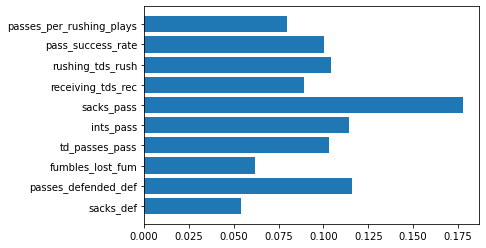

RF-ROS


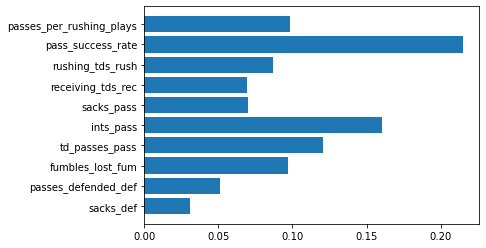

RF-ROS-RUS


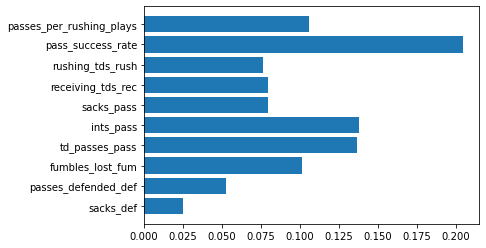

RF-SMOTE


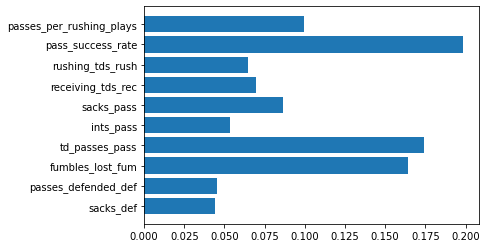

RF-SMOTEENN


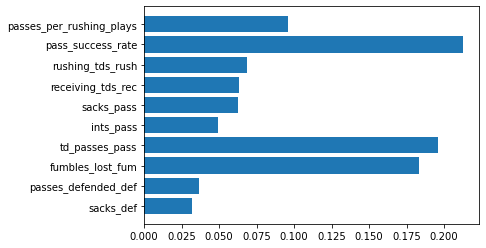

IRF


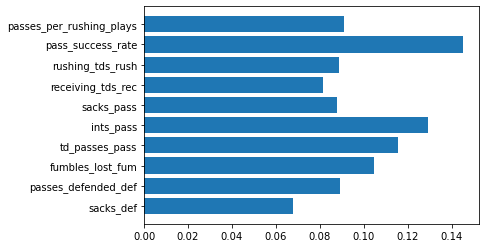

In [30]:
# Plot descriptive statistics of feature importances
for col in fi_df.columns:
    print(col)
    plt.figure()
    plt.barh(fi_df.index, width = fi_df[col])
    plt.show()
    plt.close()

In [31]:
# Create descriptive statistics for feature importances across models DataFrame
fi_stats_df = pd.DataFrame({"Sum":fi_df.transpose().sum(),"Mean":fi_df.transpose().mean(), "Max": fi_df.transpose().max(),
             "Min": fi_df.transpose().min()}, index = fi_df.index)
fi_stats_df


,Sum,Mean,Max,Min
sacks_def,0.253876,0.042313,0.067765,0.025287
passes_defended_def,0.391328,0.065221,0.115817,0.036922
fumbles_lost_fum,0.711863,0.118644,0.183181,0.061889
td_passes_pass,0.846316,0.141053,0.196069,0.103364
ints_pass,0.644643,0.107440,0.160642,0.049150
sacks_pass,0.563733,0.093956,0.177769,0.062504
receiving_tds_rec,0.452306,0.075384,0.089094,0.063255
rushing_tds_rush,0.489540,0.081590,0.104491,0.064769
pass_success_rate,1.075733,0.179289,0.214974,0.100057
passes_per_rushing_plays,0.570662,0.095110,0.105670,0.079744


Sum


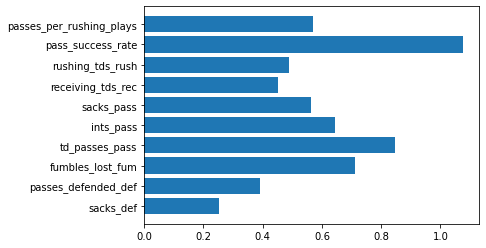

Mean


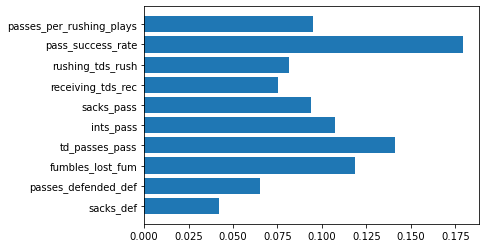

Max


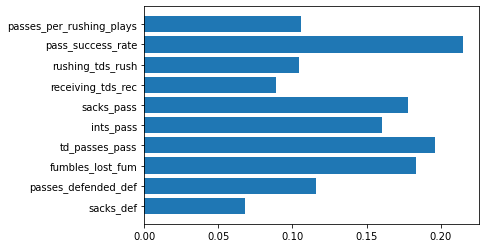

Min


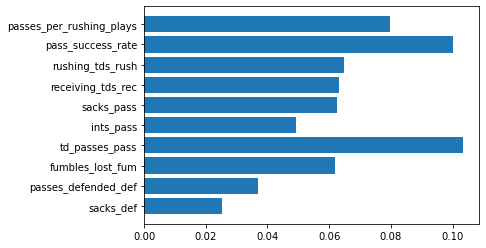

In [32]:
# Plot descriptive statistics of feature importances across models
for col in fi_stats_df.columns:
    print(col)
    plt.figure()
    plt.barh(fi_stats_df.index, width = fi_stats_df[col])
    plt.show()
    plt.close()